<a href="https://colab.research.google.com/github/Untick/insects_detection/blob/main/Svetozarov%20Andrey/Y8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget
import wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=75de15c3e27b975235c13fef3a86d197175c204d43c4e9e2cacd22ec997bc42f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import os

data_dir = "/content/data"  # Путь к папке data
if not os.path.exists(data_dir):
    os.makedirs(data_dir)


In [4]:
!apt-get -qq install git

In [6]:
repo_url = "https://github.com/Untick/insects_detection.git"
repo_dir = os.path.join(data_dir, "insects_detection")

# Клонирование репозитория
!git clone $repo_url $repo_dir


Cloning into '/content/data/insects_detection'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 176 (delta 42), reused 90 (delta 25), pack-reused 60
Receiving objects: 100% (176/176), 19.92 MiB | 11.61 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [8]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.9/608.9 kB 6.6 MB/s eta 0:00:00


In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model



100%|██████████| 6.23M/6.23M [00:00<00:00, 42.9MB/s]


In [10]:
# Train the model
results = model.train(data="/content/data/insects_detection/_data/markup4OD/Cabbage high angle.v1i.yolov8/data.yaml", imgsz=800, batch=8, epochs=50, plots=True)

Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/insects_detection/_data/markup4OD/Cabbage high angle.v1i.yolov8/data.yaml, epochs=50, patience=50, batch=8, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

In [11]:
 model.val(conf=0.5)
 # or you can set the data you want to val
 model.val(data="/content/data/insects_detection/_data/markup4OD/Cabbage high angle.v1i.yolov8/data.yaml", conf=0.5)

Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/data/insects_detection/_data/markup4OD/Cabbage high angle.v1i.yolov8/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]
                   all          3         12          1     0.0833      0.542      0.433
Speed: 3.3ms preprocess, 325.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val
Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
val: Scanning /content/data/insects_detection/_data/markup4OD/Cabbage high angle.v1i.yolov8/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8440a6af20>
fitness: 0.44415672727272726
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.43332])
names: {0: 'holes'}
plot: True
results_dict: {'metrics/precision(B)': 1.0, 'metrics/recall(B)': 0.08333333333333333, 'metrics/mAP50(B)': 0.5416545454545454, 'metrics/mAP50-95(B)': 0.4333236363636363, 'fitness': 0.44415672727272726}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 3.208796183268229, 'inference': 389.0635172526042, 'loss': 0.0008742014567057291, 'postprocess': 0.3992716471354167}

In [18]:
from IPython.display import Image


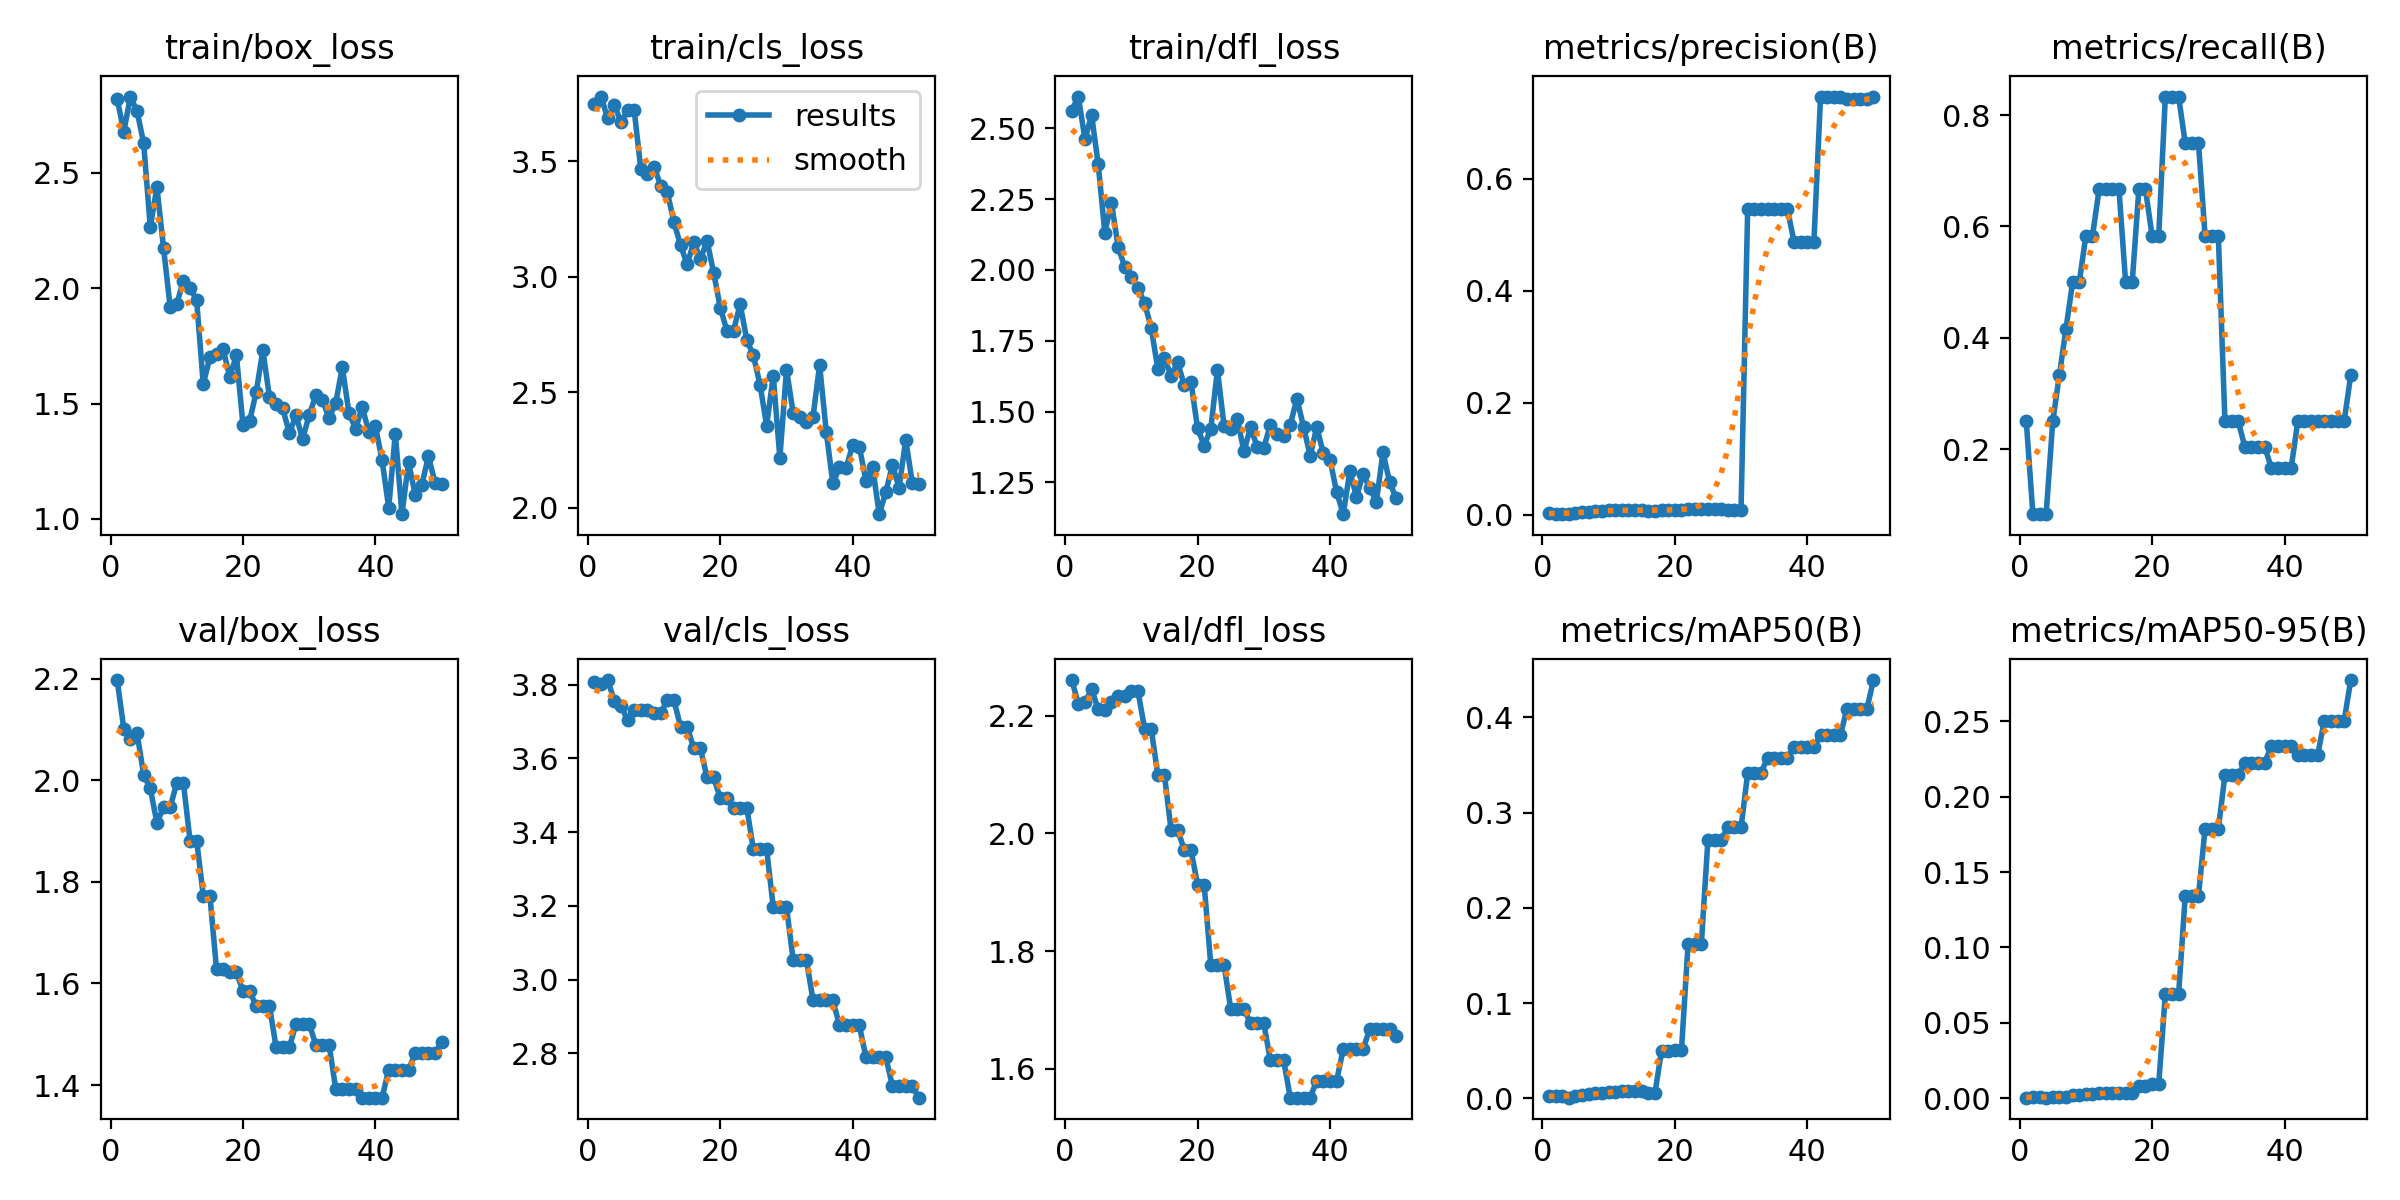

In [23]:
Image(filename='/content/runs/detect/train/results.png', height=600)

In [28]:
model = YOLO("./runs/detect/train/weights/best.pt")
results = model.predict(source="/content/data/insects_detection/_data/markup4OD/Cabbage high angle.v1i.yolov8/test/images/frame_0733_jpg.rf.b00c4f94302f76894d66bca4c724678c.jpg", conf=0.40, save=True, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/data/insects_detection/_data/markup4OD/Cabbage high angle.v1i.yolov8/test/images/frame_0733_jpg.rf.b00c4f94302f76894d66bca4c724678c.jpg: 800x800 1 holes, 331.3ms
Speed: 6.9ms preprocess, 331.3ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict


In [26]:
print("Bounding box coordinates:", results[0].boxes.xyxy)
print("Log probability of assigned class", results[0].boxes.conf)
print("Assigned class:", results[0].boxes.cls)


Bounding box coordinates: tensor([[253.3228, 349.1463, 358.6982, 493.9706]])
Log probability of assigned class tensor([0.5180])
Assigned class: tensor([0.])


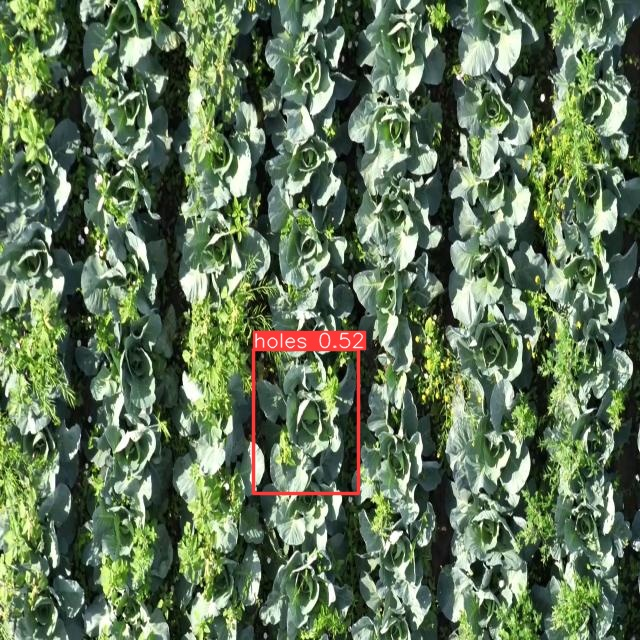

In [29]:
Image(filename='/content/runs/detect/predict/frame_0733_jpg.rf.b00c4f94302f76894d66bca4c724678c.jpg', height=600)

# Далее пробовал идентифицировать дырки на фото из свежего архива Артема

In [30]:
import os
import zipfile
import requests


In [31]:
data_dir = "/content/test_data"  # Путь к папке с новыми тестовыми данными
if not os.path.exists(data_dir):
    os.makedirs(data_dir)


In [32]:
zip_url = "https://github.com/Untick/insects_detection/raw/main/_data/markup4OD/Cabbage_different_angle_yolov8_84_frames.zip"
zip_filename = os.path.join(data_dir, "Cabbage_different_angle_yolov8_84_frames.zip")

response = requests.get(zip_url)
with open(zip_filename, "wb") as zip_file:
    zip_file.write(response.content)


In [33]:
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(data_dir)


In [42]:
model = YOLO("./runs/detect/train/weights/best.pt")
results = model.predict(source="/content/test_data/Data_84_frames/images/42_jpeg.rf.38306232d866ee618dc97cec34d86ef5.jpg", save=True, show=True)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/test_data/Data_84_frames/images/42_jpeg.rf.38306232d866ee618dc97cec34d86ef5.jpg: 800x800 (no detections), 331.8ms
Speed: 7.7ms preprocess, 331.8ms inference, 0.7ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict6


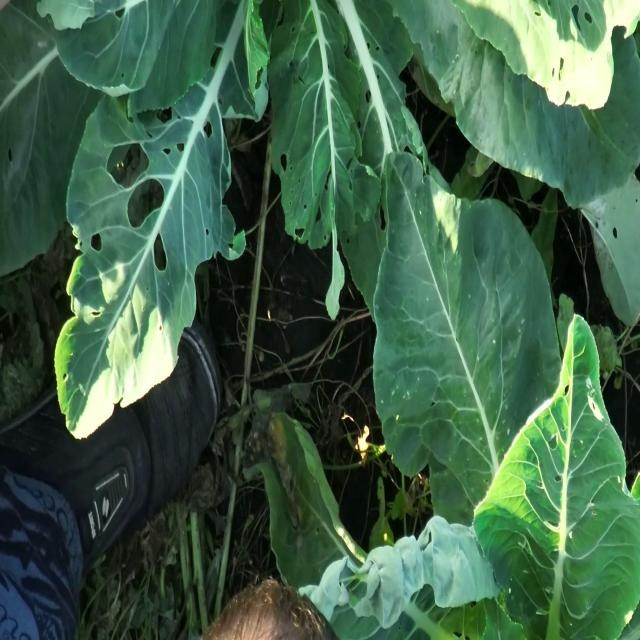

In [43]:
Image(filename='/content/runs/detect/predict6/42_jpeg.rf.38306232d866ee618dc97cec34d86ef5.jpg', height=600)